# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [1]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

In [2]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_recall_fscore_support,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression

plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [3]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [4]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [5]:
# Loading the dataset
# eg.
dirpath1 = './dataset/IMFDB/'
dirpath2 = './dataset/IIIT-CFW/'
dirpath3 = './dataset/Yale_face_database/'

X_IMFDB,y_IMFDB = load_data(dirpath1)
X_IIITCFW,y_IIITCFW = load_data(dirpath2)
X_Yale,y_Yale = load_data(dirpath3)

N1,H1,W1 = X_IMFDB.shape[0:3]
N2,H2,W2 = X_IIITCFW.shape[0:3]
N3,H3,W3 = X_Yale.shape[0:3]

C1 = 1 if opt['is_grayscale'] else X_IMFDB.shape[3]
C2 = 1 if opt['is_grayscale'] else X_IIITCFW.shape[3]
C3 = 1 if opt['is_grayscale'] else X_Yale.shape[3]

Dataset shape: (400, 32, 32, 3)
Dataset shape: (672, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


Dataset: IMFDB


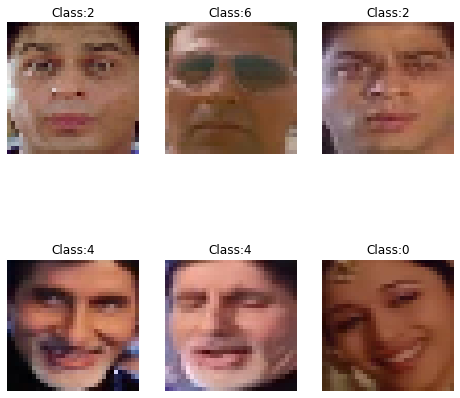

Dataset: IIIT-CFW


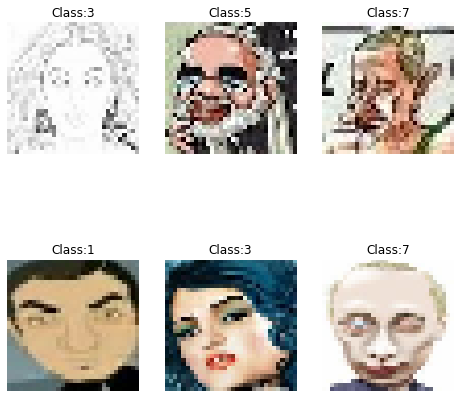

Dataset: Yale Face Database


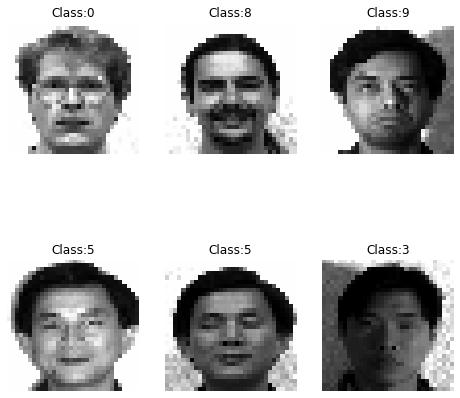

In [6]:
print('Dataset: IMFDB')
ind = np.random.randint(0,y_IMFDB.shape[0],6)
disply_images(X_IMFDB[ind,...],y_IMFDB[ind], row=2,col=3)

print('Dataset: IIIT-CFW')
ind = np.random.randint(0,y_IIITCFW.shape[0],6)
disply_images(X_IIITCFW[ind,...],y_IIITCFW[ind], row=2,col=3)

print('Dataset: Yale Face Database')
ind = np.random.randint(0,y_Yale.shape[0],6)
disply_images(X_Yale[ind,...],y_Yale[ind], row=2,col=3)



# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [7]:
X_IMFDB = X_IMFDB.reshape((N1,H1*W1*C1))
X_IIITCFW = X_IIITCFW.reshape((N2,H2*W2*C2))
X_Yale = X_Yale.reshape((N3,H3*W3*C3))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [8]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return pca,X_k

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [9]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_k = kpca.fit_transform(X)
    return kpca,X_k

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [10]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return lda,X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [11]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X,y)
    return klda,X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [12]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [13]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

___________________________

Your answers here (double click to edit)


1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [14]:
cov_IMFDB = np.cov(X_IMFDB.T)
Vals_IMFDB,Vecs_IMFDB = linalg.eig(cov_IMFDB)

cov_IIITCFW = np.cov(X_IIITCFW.T)
Vals_IIITCFW,Vecs_IIITCFW = linalg.eig(cov_IIITCFW)

cov_Yale = np.cov(X_Yale.T)
Vals_Yale,Vecs_Yale = linalg.eig(cov_Yale)

In [15]:
#NumComponents of Dataset IMFDB


Thresh = 0.14
new_Vals_IMFDB = Vals_IMFDB[np.where(Vals_IMFDB > Thresh)]
NumComponent_IMFDB = len(new_Vals_IMFDB)

#NumComponents of Dataset IIIT-CFW

Thresh = 0.35
new_Vals_IIITCFW = Vals_IIITCFW[np.where(Vals_IIITCFW > Thresh)]
NumComponent_IIITCFW = len(new_Vals_IIITCFW)

#NumComponents of Dataset Yale_Face_Dataset

Thresh = 0.35
new_Vals_Yale = Vals_Yale[np.where(Vals_Yale > Thresh)]
NumComponent_Yale = len(new_Vals_Yale)

print("Number of Components of Dataset:IMFDB = ",NumComponent_IMFDB)
print("Number of Components of Dataset:IIIT-CFW =",NumComponent_IIITCFW)
print("Number of Components of Dataset:Yale_Faced_Database = ",NumComponent_Yale)

NumComponent_IMFDB = 100
NumComponent_IIITCFW = 100
NumComponent_Yale = 100

Number of Components of Dataset:IMFDB =  61
Number of Components of Dataset:IIIT-CFW = 113
Number of Components of Dataset:Yale_Faced_Database =  46


In [16]:
pca_IMFDB,X_IMFDB_3D = get_pca(X_IMFDB,NumComponent_IMFDB)
kpca_IMFDB,X_IMFDB_kpca= get_kernel_pca(X_IMFDB,NumComponent_IMFDB)
lda_IMFDB,X_IMFDB_lda = get_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
klda_IMFDB,X_IMFDB_klda = get_kernel_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
X_IMFDB_vgg = get_vgg_features(dirpath1)
X_IMFDB_resnet = get_resnet_features(dirpath1)


pca_IIITCFW,X_IIITCFW_3D = get_pca(X_IIITCFW,NumComponent_IIITCFW)
kpca_IIITCFW,X_IIITCFW_kpca= get_kernel_pca(X_IIITCFW,NumComponent_IIITCFW)
lda_IIITCFW,X_IIITCFW_lda = get_lda(X_IIITCFW,y_IIITCFW,NumComponent_IIITCFW)
klda_IIITCFW,X_IIITCFW_klda = get_kernel_lda(X_IIITCFW,y_IIITCFW,NumComponent_IIITCFW)
X_IIITCFW_vgg = get_vgg_features(dirpath2)
X_IIITCFW_resnet = get_resnet_features(dirpath2)

pca_Yale,X_Yale_3D = get_pca(X_Yale,NumComponent_Yale)
kpca_Yale,X_Yale_kpca= get_kernel_pca(X_Yale,NumComponent_Yale)
lda_Yale,X_Yale_lda = get_lda(X_Yale,y_Yale,NumComponent_Yale)
klda_Yale,X_Yale_klda = get_kernel_lda(X_Yale,y_Yale,NumComponent_Yale)
X_Yale_vgg = get_vgg_features(dirpath3)
X_Yale_resnet = get_resnet_features(dirpath3)

Text(0.5, 0.92, 'Dataset: Yale Faced Database')

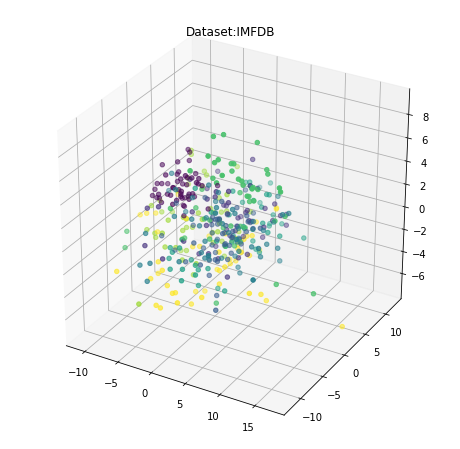

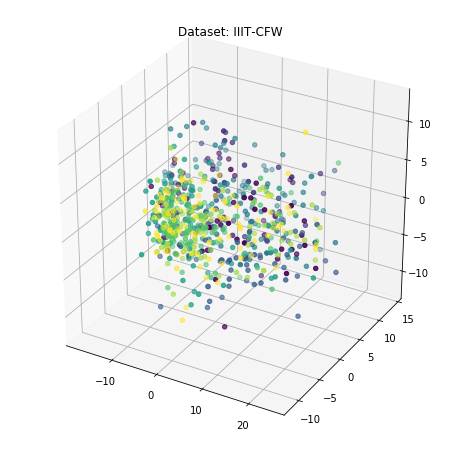

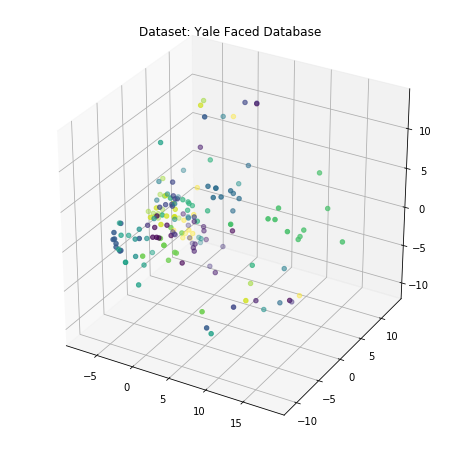

In [17]:
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X_IMFDB_3D[:,0],X_IMFDB_3D[:,1],X_IMFDB_3D[:,2],c=y_IMFDB)
plt.title('Dataset:IMFDB')

fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X_IIITCFW_3D[:,0],X_IIITCFW_3D[:,1],X_IIITCFW_3D[:,2],c=y_IIITCFW)
plt.title('Dataset: IIIT-CFW')

fig3 = plt.figure(figsize=(8,8))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X_Yale_3D[:,0],X_Yale_3D[:,1],X_Yale_3D[:,2],c=y_Yale)
plt.title('Dataset: Yale Faced Database')



/home/akhil/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(0.5, 1.0, 'Eigen Spectrum of Dataset Yale_Faced Dataset')

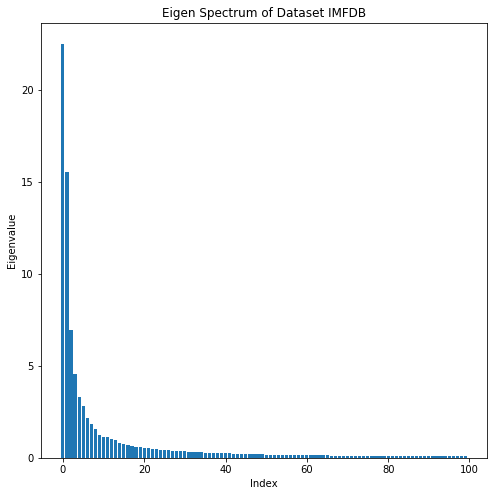

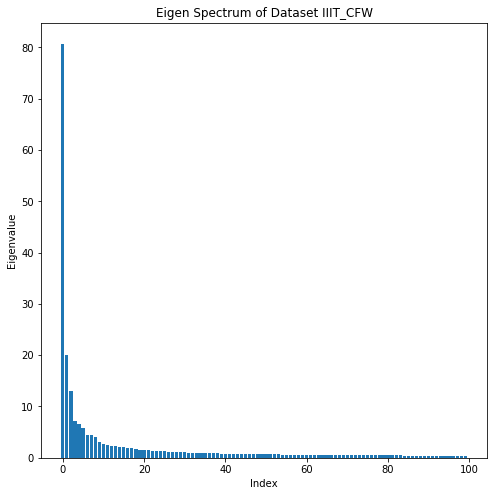

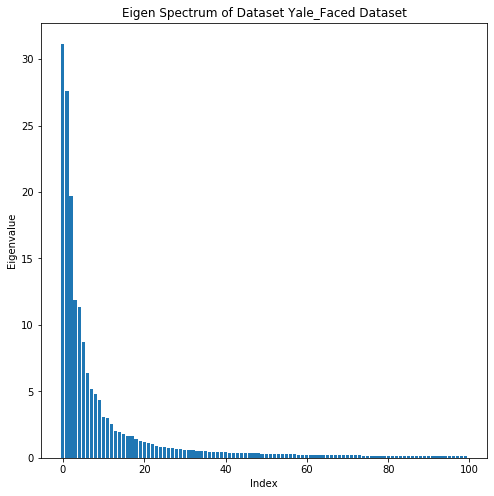

In [18]:
# Plot the eigen value spectrum 

fig1 = plt.figure(figsize=(8,8))
index1 = np.arange(NumComponent_IMFDB)
plt.bar(index1,Vals_IMFDB[0:100])

plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigen Spectrum of Dataset IMFDB')


fig2 = plt.figure(figsize=(8,8))
index2 = np.arange(NumComponent_IIITCFW)
plt.bar(index2,Vals_IIITCFW[0:100])
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigen Spectrum of Dataset IIIT_CFW')


fig3 = plt.figure(figsize=(8,8))
index3 = np.arange(NumComponent_Yale)
plt.bar(index3,Vals_Yale[0:100])
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigen Spectrum of Dataset Yale_Faced Dataset')




1(c). Reconstruct  the  image  back for each case


In [19]:
def reconstruct_images(pca,X):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    pass
    reconstruct_X = pca.inverse_transform(X)
    return reconstruct_X    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


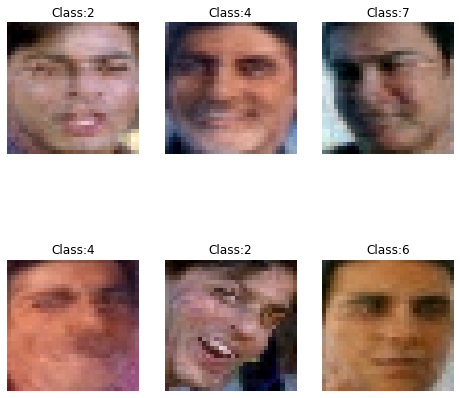

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction Error for IMFDB Dataset:  0.04438287451251263


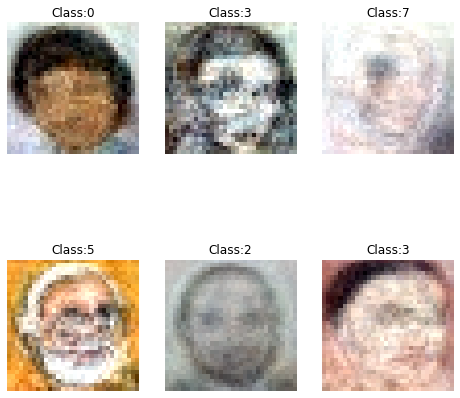

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction Error for IMFDB Dataset:  0.1368856597469202


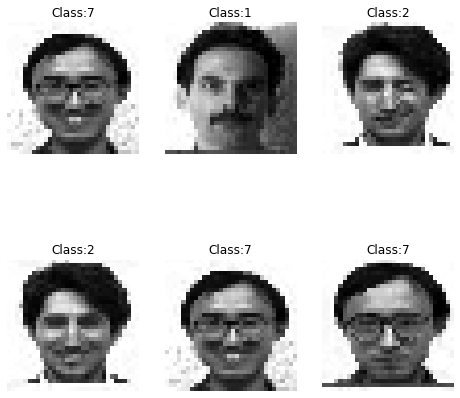

Reconstruction Error for Yaled Faced Dataset: 0.03155927641978516


In [20]:
#IMFDB

X_reconstructed_IMFDB = reconstruct_images(pca_IMFDB,X_IMFDB_3D)
X_reconstructed_IMFDB_3D = np.reshape(X_reconstructed_IMFDB,(N1,H1,W1,C1))
# Display random images
ind = np.random.randint(0,y_IMFDB.shape[0],6)
disply_images(X_reconstructed_IMFDB_3D[ind,...],y_IMFDB[ind],row=2,col=3)
# Show the reconstruction error
print("Reconstruction Error for IMFDB Dataset: ",np.sqrt(np.mean((X_IMFDB - X_reconstructed_IMFDB)**2)))


#IIIT-CFW
X_reconstructed_IIITCFW = reconstruct_images(pca_IIITCFW,X_IIITCFW_3D)
X_reconstructed_IIITCFW_3D = np.reshape(X_reconstructed_IIITCFW,(N2,H2,W2,C2))
# Display random images
ind = np.random.randint(0,y_IIITCFW.shape[0],6)
disply_images(X_reconstructed_IIITCFW_3D[ind,...],y_IIITCFW[ind],row=2,col=3)
# Show the reconstruction error
print("Reconstruction Error for IMFDB Dataset: ",np.sqrt(np.mean((X_IIITCFW - X_reconstructed_IIITCFW)**2)))


#Yale
X_reconstructed_Yale = reconstruct_images(pca_Yale,X_Yale_3D)
X_reconstructed_Yale_3D = np.reshape(X_reconstructed_Yale,(N3,H3,W3,C3))

# Display random images
ind = np.random.randint(0,y_Yale.shape[0],6)
disply_images(X_reconstructed_Yale_3D[ind,...],y_Yale[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction Error for Yaled Faced Dataset:" , np.sqrt(np.mean((X_Yale - X_reconstructed_Yale)**2)))

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

In [21]:
# code goes here
print("Dataset:IMFDB")
for key,val in imfdb_dict.items():
    ind = np.where(y_IMFDB==val)
    E = np.sqrt(np.mean((X_IMFDB[ind] - X_reconstructed_IMFDB[ind])**2))
    print(key,"Loss: ",E)

print("\n")
print("Dataset:IIITCFW")
for key,val in cfw_dict.items():
    ind = np.where(y_IIITCFW==val)
    E = np.sqrt(np.mean((X_IIITCFW[ind] - X_reconstructed_IIITCFW[ind])**2))
    print(key,"Loss: ",E)


Dataset:IMFDB
MadhuriDixit Loss:  0.04140086850560983
Kajol Loss:  0.04383500126076856
SharukhKhan Loss:  0.044925816087606256
ShilpaShetty Loss:  0.04571731956660528
AmitabhBachan Loss:  0.04529999133614763
KatrinaKaif Loss:  0.044233542867817895
AkshayKumar Loss:  0.04591572976960596
Amir Loss:  0.04356403472975178


Dataset:IIITCFW
Amitabhbachan Loss:  0.12467186851033173
AamirKhan Loss:  0.1356879574268291
DwayneJohnson Loss:  0.1178140215991745
AishwaryaRai Loss:  0.12545899132633823
BarackObama Loss:  0.1354811630689998
NarendraModi Loss:  0.15235487089343536
ManmohanSingh Loss:  0.14952042258402684
VladimirPutin Loss:  0.14009569686724768


2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [22]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 

class Classifier():
    def __init__(self,method,kernel='linear', gamma = 'auto',max_iters = 1000,degree = 3,hidden_layer_sizes = (5000,)):

        if method == 'SVM':
            self.classifier = SVC(C = 1,max_iter = max_iters,kernel = kernel,gamma = gamma,degree = degree)
        elif method == 'MLP':
            self.classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
        elif method == 'Logistic regression':
            self.classifier = LogisticRegression(random_state = 0,solver = 'lbfgs',multi_class = 'multinomial')

    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.classifier.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return confusion_matrix(y, pred)
        
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.classifier.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        y_predicted = self.classify(X_validate)
        
        # Create a confusion matrix
        confusion_matrix = self.confusion_matrix(y_predicted,y_validate)
        
        # Calculate Validation accuracy 
        accuracy = accuracy_score(y_validate,y_predicted)
    
        # Calculate precision and recall 
        precision,recall,fscore,_ = precision_recall_fscore_support(y_validate,y_predicted,average="micro")
        
        # Calculate F1-score
    
        return (fscore,accuracy,precision,recall,confusion_matrix)

In [23]:
# Create a train and validation split to train your classifier
X_train_IMFDB,X_test_IMFDB,y_train_IMFDB,y_test_IMFDB = train_test_split(X_IMFDB,y_IMFDB,test_size = 0.1,random_state=76)
X_train_IIITCFW,X_test_IIITCFW,y_train_IIITCFW,y_test_IIITCFW = train_test_split(X_IIITCFW,y_IIITCFW,test_size = 0.1,random_state=76)
X_train_Yale,X_test_Yale,y_train_Yale,y_test_Yale = train_test_split(X_Yale,y_Yale,test_size = 0.1,random_state=76)


In [24]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

conf_Matrix_IMFDB = {}
conf_Matrix_IIITCFW= {}
conf_Matrix_Yale = {}

def featureAndclassifiers(X_train,y_train,X_test,y_test,feature,classifier,NumComp,dirpath,table):
    if feature == 'pca':
        pca,X = get_pca(X_train,NumComp)
        X_test = pca.transform(X_test)
    elif feature == 'kpca':
        kpca,X = get_kernel_pca(X_train,NumComp)
        X_test = kpca.transform(X_test)
    elif feature == 'lda':
        lda,X = get_lda(X_train,y_train,NumComp)
        X_test = lda.transform(X_test)
    elif feature == 'klda':
        klda,X = get_kernel_lda(X_train,y_train,NumComp)
        X_test = klda.transform(X_test)
    elif feature == 'vgg':
        X = get_vgg_features(dirpath)
        if dirpath == './dataset/IMFDB/':
            X,X_test,y_train,y_test = train_test_split(X,y_IMFDB,test_size = 0.2,random_state=76)
        elif dirpath == './dataset/IIIT-CFW/':
            X,X_test,y_train,y_test = train_test_split(X,y_IIITCFW,test_size = 0.2,random_state=76)
        elif dirpath == './dataset/Yale_face_database/':
            X,X_test,y_train,y_test = train_test_split(X,y_Yale,test_size = 0.2,random_state=76)
            
    elif feature == 'resnet':
        X = get_resnet_features(dirpath)
        if dirpath == './dataset/IMFDB/':
            X,X_test,y_train,y_test = train_test_split(X,y_IMFDB,test_size = 0.2,random_state=76)
        elif dirpath == './dataset/IIIT-CFW/':
            X,X_test,y_train,y_test = train_test_split(X,y_IIITCFW,test_size = 0.2,random_state=76)
        elif dirpath == './dataset/Yale_face_database/':
            X,X_test,y_train,y_test = train_test_split(X,y_Yale,test_size = 0.2,random_state=76)
        
        
    if  classifier == 'mlp':
        yo_classifier = Classifier('MLP',hidden_layer_sizes=(320,160))
        yo_classifier.train(X,y_train)
        
    elif classifier == 'svm':
        yo_classifier = Classifier('SVM')
        yo_classifier.train(X,y_train)
        
    elif classifier == 'logistic':
        yo_classifier = Classifier('Logistic regression')
        yo_classifier.train(X,y_train)
    
    fscore,accuracy,precision,recall,confusion_matrix = yo_classifier.validate(X_test,y_test)
    
    
    table["Feature Used"].append(feature+" with " + classifier)
    table["Reduced Dimension Space"].append(X.shape[1])
    table["Classification Error"].append(1-accuracy)
    table["Accuracy"].append(accuracy)
    table["F1-Score"].append(fscore)
    
    return (pd.DataFrame(table),accuracy,confusion_matrix)

# Print the table. (You can use Pandas)


In [25]:
print("Dataset:IMFDB")
table = {"Feature Used":[],"Reduced Dimension Space":[],"Classification Error":[],"Accuracy":[],"F1-Score":[]}
for features in ["pca","kpca","lda","klda","vgg","resnet"]:
    for classifier in ["mlp"]:
        dataframe,accuracy,c_mat = featureAndclassifiers(X_train_IMFDB,y_train_IMFDB,X_test_IMFDB,y_test_IMFDB,features,classifier,NumComponent_IMFDB,dirpath1,table)
        conf_Matrix_IMFDB[accuracy] = (c_mat,features + " with " + classifier)
dataframe



Dataset:IMFDB


,Feature Used,Reduced Dimension Space,Classification Error,Accuracy,F1-Score
0,pca with mlp,100,0.1250,0.8750,0.8750
1,kpca with mlp,100,0.1750,0.8250,0.8250
2,lda with mlp,7,0.2250,0.7750,0.7750
3,klda with mlp,7,0.2500,0.7500,0.7500
4,vgg with mlp,4096,0.1250,0.8750,0.8750
5,resnet with mlp,2048,0.0375,0.9625,0.9625


In [26]:
print("Dataset:IIIT-CFW")
table = {"Feature Used":[],"Reduced Dimension Space":[],"Classification Error":[],"Accuracy":[],"F1-Score":[]}
for features in ["pca","kpca","lda","klda","vgg","resnet"]:
    for classifier in ["mlp"]:
        dataframe,accuracy,c_mat = featureAndclassifiers(X_train_IIITCFW,y_train_IIITCFW,X_test_IIITCFW,y_test_IIITCFW,features,classifier,NumComponent_IIITCFW,dirpath2,table)
        conf_Matrix_IIITCFW[accuracy] = (c_mat,features + " with " + classifier)
dataframe


Dataset:IIIT-CFW


,Feature Used,Reduced Dimension Space,Classification Error,Accuracy,F1-Score
0,pca with mlp,100,0.382353,0.617647,0.617647
1,kpca with mlp,100,0.426471,0.573529,0.573529
2,lda with mlp,7,0.720588,0.279412,0.279412
3,klda with mlp,7,0.750000,0.250000,0.250000
4,vgg with mlp,4096,0.266667,0.733333,0.733333
5,resnet with mlp,2048,0.029630,0.970370,0.970370


In [27]:
print("Dataset:Yale Faced Database")
table = {"Feature Used":[],"Reduced Dimension Space":[],"Classification Error":[],"Accuracy":[],"F1-Score":[]}
for features in ["pca","kpca","lda","klda","vgg","resnet"]:
    for classifier in ["mlp"]:
        dataframe,accuracy,c_mat = featureAndclassifiers(X_train_Yale,y_train_Yale,X_test_Yale,y_test_Yale,features,classifier,NumComponent_Yale,dirpath3,table)
        conf_Matrix_Yale[accuracy] = (c_mat,features + " with " + classifier)
dataframe

Dataset:Yale Faced Database


,Feature Used,Reduced Dimension Space,Classification Error,Accuracy,F1-Score
0,pca with mlp,100,0.000000,1.000000,1.000000
1,kpca with mlp,100,0.000000,1.000000,1.000000
2,lda with mlp,14,0.000000,1.000000,1.000000
3,klda with mlp,14,0.000000,1.000000,1.000000
4,vgg with mlp,4096,0.515152,0.484848,0.484848
5,resnet with mlp,2048,0.000000,1.000000,1.000000


In [28]:
# For each dataset print the confusion matrix for the best model
print("Dataset:IMFDB\n")
best_conf_Matrix_IMFDB = sorted(conf_Matrix_IMFDB,reverse=True)
print('Accuracy ',best_conf_Matrix_IMFDB[0]*100," for ",conf_Matrix_IMFDB[best_conf_Matrix_IMFDB[0]][1])
print("CONFUSION MATRIX for Dataset:IMFDB:\n",conf_Matrix_IMFDB[best_conf_Matrix_IMFDB[0]][0])
print()


print("Dataset:IIIT-CFW\n")
best_conf_Matrix_IIITCFW = sorted(conf_Matrix_IIITCFW,reverse=True)
print('Accuracy ',best_conf_Matrix_IIITCFW[0]*100,' for ',conf_Matrix_IIITCFW[best_conf_Matrix_IIITCFW[0]][1])
print("CONFUSION MATRIX for Dataset:IIIT-CFW:\n",conf_Matrix_IIITCFW[best_conf_Matrix_IIITCFW[0]][0])
print()


print("Dataset:Yale faced Database\n")
best_conf_Matrix_Yale = sorted(conf_Matrix_Yale,reverse=True)
print('Accuracy ',best_conf_Matrix_Yale[0]*100,' for ',conf_Matrix_Yale[best_conf_Matrix_Yale[0]][1])
print("CONFUSION MATRIX Dataset:Yale faced Database :\n",conf_Matrix_Yale[best_conf_Matrix_Yale[0]][0])





Dataset:IMFDB

Accuracy  96.25  for  resnet with mlp
CONFUSION MATRIX for Dataset:IMFDB:
 [[ 7  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  1  1  0]
 [ 0  0  7  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  9  0  0]
 [ 0  0  0  1  0  0 12  0]
 [ 0  0  0  0  0  0  0 13]]

Dataset:IIIT-CFW

Accuracy  97.03703703703704  for  resnet with mlp
CONFUSION MATRIX for Dataset:IIIT-CFW:
 [[14  0  0  0  0  0  0  1]
 [ 0  9  0  0  0  0  0  0]
 [ 0  0 14  0  1  0  0  0]
 [ 0  0  0 20  0  0  0  0]
 [ 0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0 20  0  1]
 [ 0  0  0  0  0  0 21  0]
 [ 0  0  0  0  1  0  0 19]]

Dataset:Yale faced Database

Accuracy  100.0  for  resnet with mlp
CONFUSION MATRIX Dataset:Yale faced Database :
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 

3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

In [29]:
def Plot3D(X,y):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0],X[:,1],X[:,2],c=y)
    
def Plot2D(X,y):
    fig = plt.figure(figsize=(12,12))
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

DATASET:IMFDB



<Figure size 432x288 with 0 Axes>

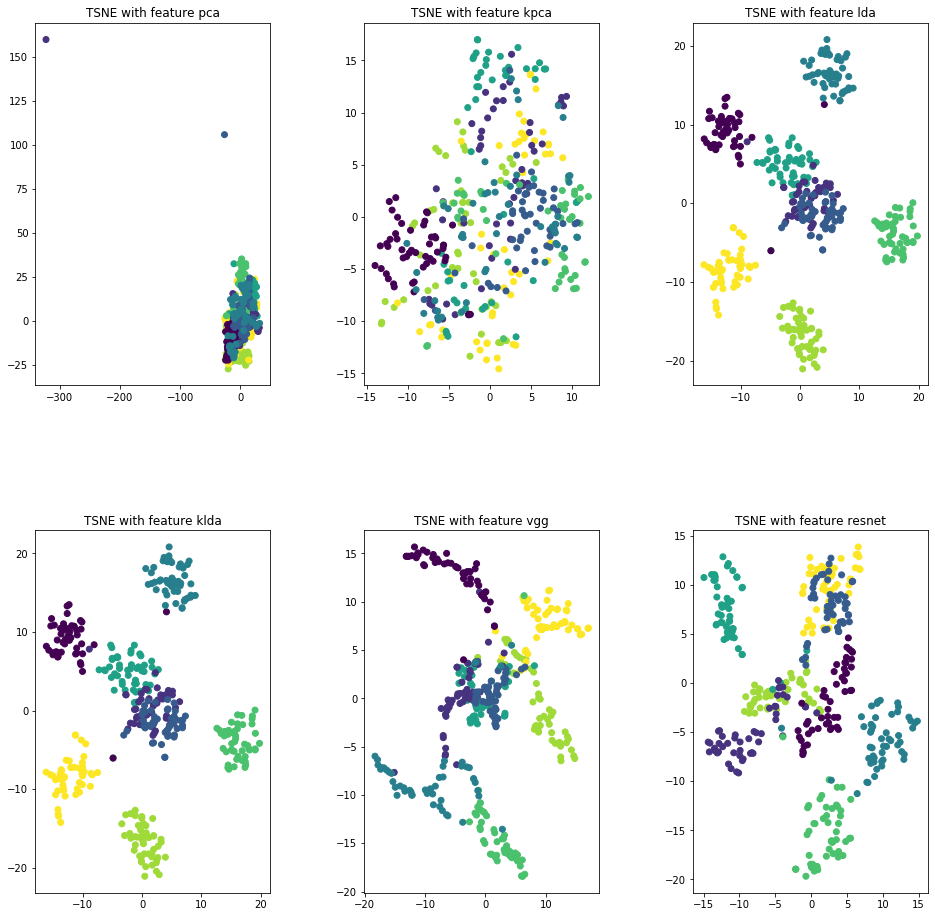

In [30]:
# Compute TSNE for different features and create a scatter plot
_,X1 = get_pca(X_IMFDB,NumComponent_IMFDB)
_,X2 = get_kernel_pca(X_IMFDB,NumComponent_IMFDB)
_,X3 = get_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
_,X4 = get_kernel_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
X5 = get_vgg_features(dirpath1)
X6 = get_resnet_features(dirpath1)

data = [X1,X2,X3,X4,X5,X6]
F = ['pca','kpca','lda','klda','vgg','resnet']

k = 3
fig = plt.figure()
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print("DATASET:IMFDB\n")
for i in range(0,len(data)):
    ax = fig.add_subplot(2, 3, i+1)
    X_TSNE_IMFDB = TSNE(n_components=k,perplexity=8,learning_rate=70,n_iter=1000,random_state=100).fit_transform(data[i])
    ax.scatter(X_TSNE_IMFDB[:,0],X_TSNE_IMFDB[:,1],c=y_IMFDB)
    plt.title('TSNE with feature {}'.format(F[i]))



# Plot the representation in 2d/3d


DATASET:IIIT-CFW



<Figure size 432x288 with 0 Axes>

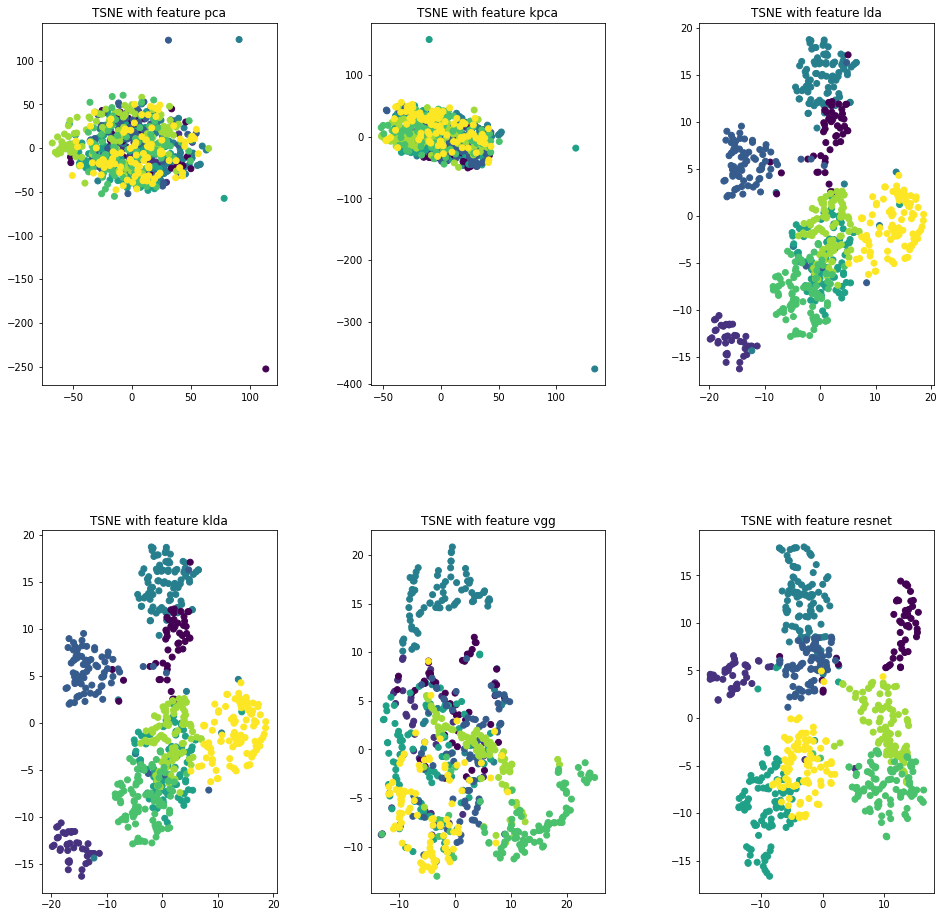

In [31]:
# Compute TSNE for different features and create a scatter plot
# Compute TSNE for different features and create a scatter plot
_,X1 = get_pca(X_IIITCFW,NumComponent_IIITCFW)
_,X2 = get_kernel_pca(X_IIITCFW,NumComponent_IIITCFW)
_,X3 = get_lda(X_IIITCFW,y_IIITCFW,NumComponent_IIITCFW)
_,X4 = get_kernel_lda(X_IIITCFW,y_IIITCFW,NumComponent_IIITCFW)
X5 = get_vgg_features(dirpath2)
X6 = get_resnet_features(dirpath2)

data = [X1,X2,X3,X4,X5,X6]

fig = plt.figure()
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

print("DATASET:IIIT-CFW\n")
for i in range(0,len(data)):
    ax = fig.add_subplot(2, 3, i+1)
    X_TSNE_IIITCFW = TSNE(n_components=k,perplexity=8,learning_rate=70,n_iter=1000,random_state=100).fit_transform(data[i])
    ax.scatter(X_TSNE_IIITCFW[:,0],X_TSNE_IIITCFW[:,1],c=y_IIITCFW)
    plt.title('TSNE with feature {}'.format(F[i]))


DATASET:Yale Faced Database



<Figure size 432x288 with 0 Axes>

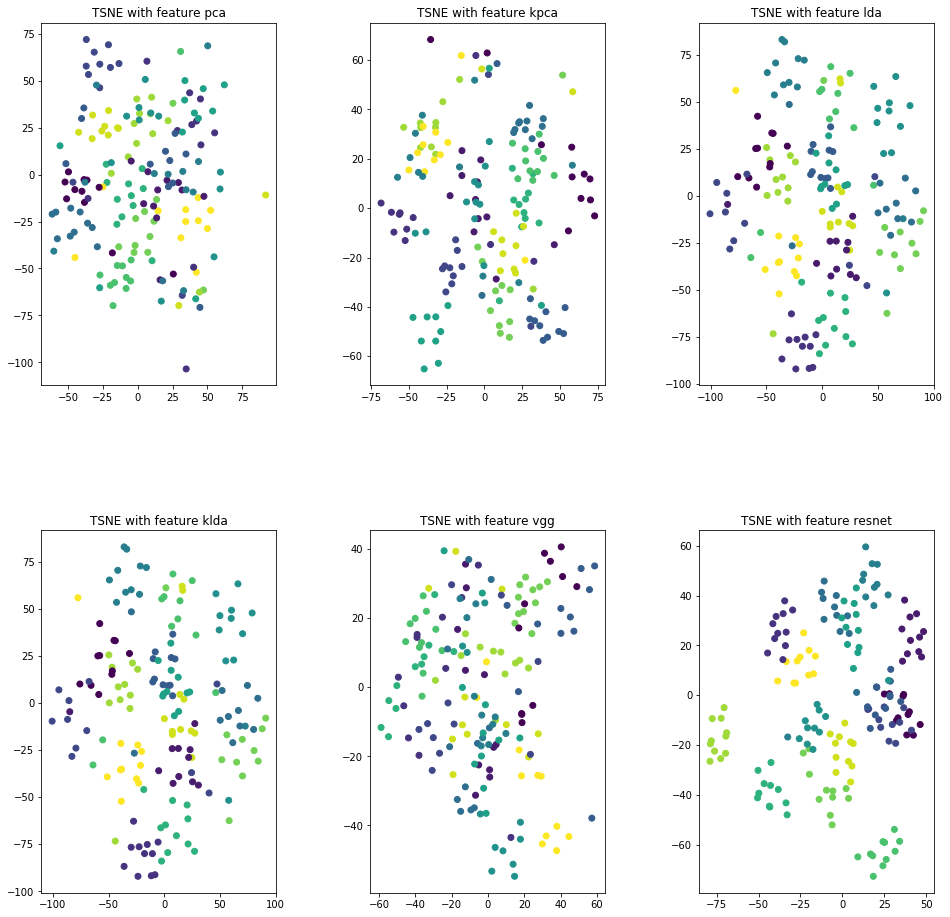

In [32]:
# Compute TSNE for different features and create a scatter plot
_,X1 = get_pca(X_Yale,NumComponent_Yale)
_,X2 = get_kernel_pca(X_Yale,NumComponent_Yale)
_,X3 = get_lda(X_Yale,y_Yale,NumComponent_Yale)
_,X4 = get_kernel_lda(X_Yale,y_Yale,NumComponent_Yale)
X5 = get_vgg_features(dirpath3)
X6 = get_resnet_features(dirpath3)

data = [X1,X2,X3,X4,X5,X6]

fig = plt.figure()
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

print("DATASET:Yale Faced Database\n")
for i in range(0,len(data)):
    ax = fig.add_subplot(2, 3, i+1)
    X_TSNE_Yale = TSNE(n_components=k,perplexity=8,learning_rate=70,n_iter=1000,random_state=100).fit_transform(data[i])
    ax.scatter(X_TSNE_Yale[:,0],X_TSNE_Yale[:,1],c=y_Yale)
    plt.title('TSNE with feature {}'.format(F[i]))




4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [33]:
class FaceVerification():
    def __init__(self,k):
        self.k = k
        self.neighbours = KNeighborsClassifier(n_neighbors=self.k)
        
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        X = X.reshape(1,-1)
        if class_id == self.neighbours.predict(X):
            verification_results =  True
        else:
            verification_results =  False
        
        return verfication_results
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.neighbours.fit(X_train, y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        predictions = self.neighbours.predict(X_validate)
        accuracy = accuracy_score(y_validate,predictions)
        precision,recall,fscore,_ = precision_recall_fscore_support(y_validate,predictions,average="micro")
        return accuracy*100,precision

In [34]:
# Create a train and validation split and show your results 
# Create a train and validation split and show your results
_,X1 = get_pca(X_IMFDB,NumComponent_IMFDB)
_,X2 = get_kernel_pca(X_IMFDB,NumComponent_IMFDB)
_,X3 = get_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
_,X4 = get_kernel_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
X5 = get_vgg_features(dirpath1)
X6 = get_resnet_features(dirpath1)

data = [X1,X2,X3,X4,X5,X6]

features_IMFDB = {}

features_IMFDB['pca'] = X1
features_IMFDB['kpca'] = X2
features_IMFDB['lda'] = X3
features_IMFDB['klda'] = X4
features_IMFDB['resnet'] = X5
features_IMFDB['vgg'] = X6


Features = ['pca','kpca','lda','klda','resnet','vgg']

accuracies_IMFDB = {}
accuracies_IMFDB['original'] = []



for x in Features:
    accuracies_IMFDB[x] = []
    X_train,X_test,y_train,y_test = train_test_split(features_IMFDB[x],y_IMFDB,test_size = 0.2,random_state=76)
    for i in range(3,20):
        face_verification = FaceVerification(i)
        face_verification.train(X_train,y_train)
        accuracy,_ = face_verification.validate(X_test,y_test)
        accuracies_IMFDB[x].append(accuracy)
        #print("Accuracy:",face_verification.validate(X_test,y_test),"%")
        
X_train,X_test,y_train,y_test = train_test_split(X_IMFDB,y_IMFDB,test_size = 0.2,random_state=76)
for i in range(3,20):
    face_verification = FaceVerification(i)
    face_verification.train(X_train,y_train)
    accuracy,_ = face_verification.validate(X_test,y_test)
    accuracies_IMFDB['original'].append(accuracy)

In [35]:
# Create a train and validation split and show your results 
# Create a train and validation split and show your results
_,X1 = get_pca(X_IMFDB,NumComponent_IMFDB)
_,X2 = get_kernel_pca(X_IMFDB,NumComponent_IMFDB)
_,X3 = get_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
_,X4 = get_kernel_lda(X_IMFDB,y_IMFDB,NumComponent_IMFDB)
X5 = get_vgg_features(dirpath1)
X6 = get_resnet_features(dirpath1)

data = [X1,X2,X3,X4,X5,X6]

features_IMFDB = {}

features_IMFDB['pca'] = X1
features_IMFDB['kpca'] = X2
features_IMFDB['lda'] = X3
features_IMFDB['klda'] = X4
features_IMFDB['resnet'] = X5
features_IMFDB['vgg'] = X6


Features = ['pca','kpca','lda','klda','resnet','vgg']

accuracies_IMFDB = {}
accuracies_IMFDB['original'] = []



for x in Features:
    accuracies_IMFDB[x] = []
    X_train,X_test,y_train,y_test = train_test_split(features_IMFDB[x],y_IMFDB,test_size = 0.2,random_state=76)
    for i in range(3,20):
        face_verification = FaceVerification(i)
        face_verification.train(X_train,y_train)
        accuracy,_ = face_verification.validate(X_test,y_test)
        accuracies_IMFDB[x].append(accuracy)
        #print("Accuracy:",face_verification.validate(X_test,y_test),"%")
        
X_train,X_test,y_train,y_test = train_test_split(X_IMFDB,y_IMFDB,test_size = 0.2,random_state=76)
for i in range(3,20):
    face_verification = FaceVerification(i)
    face_verification.train(X_train,y_train)
    accuracy,_ = face_verification.validate(X_test,y_test)
    accuracies_IMFDB['original'].append(accuracy)
    
    


In [36]:
# Create a train and validation split and show your results 
# Create a train and validation split and show your results
_,X1 = get_pca(X_IIITCFW,NumComponent_IIITCFW)
_,X2 = get_kernel_pca(X_IIITCFW,NumComponent_IIITCFW)
_,X3 = get_lda(X_IIITCFW,y_IIITCFW,NumComponent_IIITCFW)
_,X4 = get_kernel_lda(X_IIITCFW,y_IIITCFW,NumComponent_IIITCFW)
X5 = get_vgg_features(dirpath2)
X6 = get_resnet_features(dirpath2)

data = [X1,X2,X3,X4,X5,X6]

features_IIITCFW = {}

features_IIITCFW['pca'] = X1
features_IIITCFW['kpca'] = X2
features_IIITCFW['lda'] = X3
features_IIITCFW['klda'] = X4
features_IIITCFW['resnet'] = X5
features_IIITCFW['vgg'] = X6


Features = ['pca','kpca','lda','klda','resnet','vgg']

accuracies_IIITCFW = {}
accuracies_IIITCFW['original'] = []



for x in Features:
    accuracies_IIITCFW[x] = []
    X_train,X_test,y_train,y_test = train_test_split(features_IIITCFW[x],y_IIITCFW,test_size = 0.2,random_state=76)
    for i in range(3,20):
        face_verification = FaceVerification(i)
        face_verification.train(X_train,y_train)
        accuracy,_ = face_verification.validate(X_test,y_test)
        accuracies_IIITCFW[x].append(accuracy)
        #print("Accuracy:",face_verification.validate(X_test,y_test),"%")
        
X_train,X_test,y_train,y_test = train_test_split(X_IIITCFW,y_IIITCFW,test_size = 0.2,random_state=76)
for i in range(3,20):
    face_verification = FaceVerification(i)
    face_verification.train(X_train,y_train)
    accuracy,_ = face_verification.validate(X_test,y_test)
    accuracies_IIITCFW['original'].append(accuracy)

In [37]:
# Create a train and validation split and show your results 
# Create a train and validation split and show your results
_,X1 = get_pca(X_Yale,NumComponent_Yale)
_,X2 = get_kernel_pca(X_Yale,NumComponent_Yale)
_,X3 = get_lda(X_Yale,y_Yale,NumComponent_Yale)
_,X4 = get_kernel_lda(X_Yale,y_Yale,NumComponent_Yale)
X5 = get_vgg_features(dirpath3)
X6 = get_resnet_features(dirpath3)

data = [X1,X2,X3,X4,X5,X6]

features_Yale = {}

features_Yale['pca'] = X1
features_Yale['kpca'] = X2
features_Yale['lda'] = X3
features_Yale['klda'] = X4
features_Yale['resnet'] = X5
features_Yale['vgg'] = X6


Features = ['pca','kpca','lda','klda','resnet','vgg']

accuracies_Yale = {}
accuracies_Yale['original'] = []



for x in Features:
    accuracies_Yale[x] = []
    X_train,X_test,y_train,y_test = train_test_split(features_Yale[x],y_Yale,test_size = 0.2,random_state=76)
    for i in range(3,20):
        face_verification = FaceVerification(i)
        face_verification.train(X_train,y_train)
        accuracy,_ = face_verification.validate(X_test,y_test)
        accuracies_Yale[x].append(accuracy)
        #print("Accuracy:",face_verification.validate(X_test,y_test),"%")
        
X_train,X_test,y_train,y_test = train_test_split(X_Yale,y_Yale,test_size = 0.2,random_state=76)
for i in range(3,20):
    face_verification = FaceVerification(i)
    face_verification.train(X_train,y_train)
    accuracy,_ = face_verification.validate(X_test,y_test)
    accuracies_Yale['original'].append(accuracy)

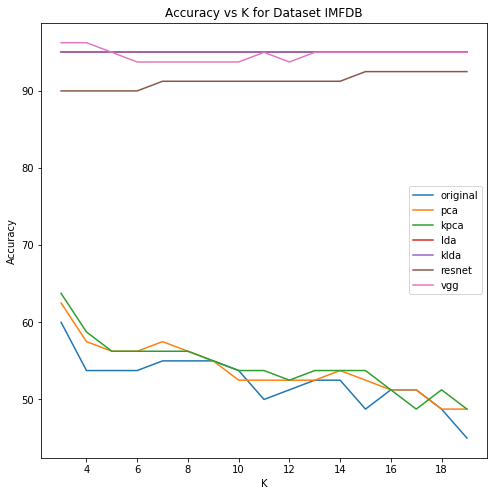

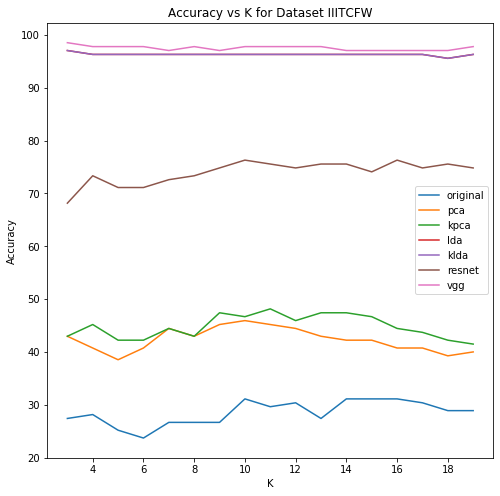

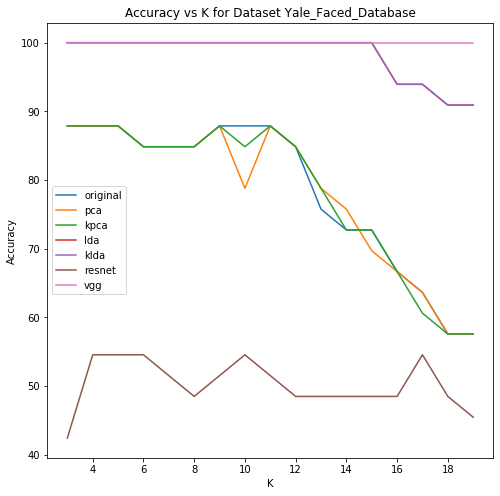

In [38]:
plt.figure(figsize=(8,8))
for i in accuracies_IMFDB:
    plt.plot(np.arange(3,20),accuracies_IMFDB[i],label=i)
plt.legend()
plt.title('Accuracy vs K for Dataset IMFDB')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(8,8))
for i in accuracies_IIITCFW:
    plt.plot(np.arange(3,20),accuracies_IIITCFW[i],label=i)
plt.title('Accuracy vs K for Dataset IIITCFW')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,8))
for i in accuracies_Yale:
    plt.plot(np.arange(3,20),accuracies_Yale[i],label=i)
plt.title('Accuracy vs K for Dataset Yale_Faced_Database')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

# Print the table. (You can use Pandas)

In [39]:
def createTable(X,y,feature,k,table):
    if feature == 'pca':
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=76)
    elif feature == 'kpca':
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=76)
    elif feature == 'lda':
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=76)
    elif feature == 'klda':
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=76)
    elif feature == 'vgg':
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=76)
    elif feature == 'resnet':
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=76)
       
    face_verification = FaceVerification(k)
    face_verification.train(X_train,y_train)
    accuracy,precision = face_verification.validate(X_test,y_test)
    
    
    
    table["Feature Used"].append(feature+" with " + "k={}".format(k) )
    table["Reduced Dimension Space"].append(X.shape[1])
    table["Classification Error"].append(100-accuracy)
    table["Accuracy"].append(accuracy)
    table["Precision"].append(precision)
    
    return (pd.DataFrame(table),accuracy)

# Print the table. (You can use Pandas)
table = {"Feature Used":[],"Reduced Dimension Space":[],"Classification Error":[],"Accuracy":[],"Precision":[]}
for features in ["pca","kpca","lda","klda","vgg","resnet"]:
        dataframe,_ = createTable(features_IMFDB[features],y_IMFDB,features,7,table)
dataframe



,Feature Used,Reduced Dimension Space,Classification Error,Accuracy,Precision
0,pca with k=7,100,42.50,57.50,0.5750
1,kpca with k=7,100,43.75,56.25,0.5625
2,lda with k=7,7,5.00,95.00,0.9500
3,klda with k=7,7,5.00,95.00,0.9500
4,vgg with k=7,2048,6.25,93.75,0.9375
5,resnet with k=7,4096,8.75,91.25,0.9125


In [40]:
table = {"Feature Used":[],"Reduced Dimension Space":[],"Classification Error":[],"Accuracy":[],"Precision":[]}
for features in ["pca","kpca","lda","klda","vgg","resnet"]:
        dataframe,_ = createTable(features_IIITCFW[features],y_IIITCFW,features,7,table)
dataframe


,Feature Used,Reduced Dimension Space,Classification Error,Accuracy,Precision
0,pca with k=7,100,55.555556,44.444444,0.444444
1,kpca with k=7,100,55.555556,44.444444,0.444444
2,lda with k=7,7,3.703704,96.296296,0.962963
3,klda with k=7,7,3.703704,96.296296,0.962963
4,vgg with k=7,2048,2.962963,97.037037,0.970370
5,resnet with k=7,4096,27.407407,72.592593,0.725926


In [41]:
table = {"Feature Used":[],"Reduced Dimension Space":[],"Classification Error":[],"Accuracy":[],"Precision":[]}
for features in ["pca","kpca","lda","klda","vgg","resnet"]:
        dataframe,_ = createTable(features_Yale[features],y_Yale,features,7,table)
dataframe


,Feature Used,Reduced Dimension Space,Classification Error,Accuracy,Precision
0,pca with k=7,100,15.151515,84.848485,0.848485
1,kpca with k=7,100,15.151515,84.848485,0.848485
2,lda with k=7,14,0.000000,100.000000,1.000000
3,klda with k=7,14,0.000000,100.000000,1.000000
4,vgg with k=7,2048,0.000000,100.000000,1.000000
5,resnet with k=7,4096,48.484848,51.515152,0.515152


### Extenstion / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

In [42]:
# Load data
X_IMFDB,y_IMFDB = load_data('./dataset/IMFDB/')
X_IIIT,y_IIIT = load_data('./dataset/IIIT-CFW/')

y = []
for i in range(len(y_IMFDB)):
    if y_IMFDB[i]==0 or y_IMFDB[i]==1 or y_IMFDB[i]==3 or y_IMFDB[i]==5:
        y.append(0)
    else:
        y.append(1)
        
for i in range(len(y_IIIT)):
    if y_IIIT[i]== 3:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)

X = np.vstack((X_IMFDB,X_IIIT))
print(X.shape)
C = 1 if opt['is_grayscale'] else X.shape[3]


Dataset shape: (400, 32, 32, 3)
Dataset shape: (672, 32, 32, 3)
(1072, 32, 32, 3)


In [43]:
import os
import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]

my_list = os.listdir("./dataset/IMFDB/")

my_list2 = os.listdir("./dataset/IIIT-CFW/")

my_list.sort(key=natural_keys)
my_list2.sort(key=natural_keys)

final_list = []
for entry in my_list:
    fullPath = os.path.join("./dataset/IMFDB/", entry)
    final_list.append(fullPath)

for entry in my_list2:
    fullPath = os.path.join("./dataset/IIIT-CFW/", entry)
    final_list.append(fullPath)


In [44]:
new_y = []
for i in range(len(y)):
    new_y.append(str(y[i]) + " " + str(final_list[i]))

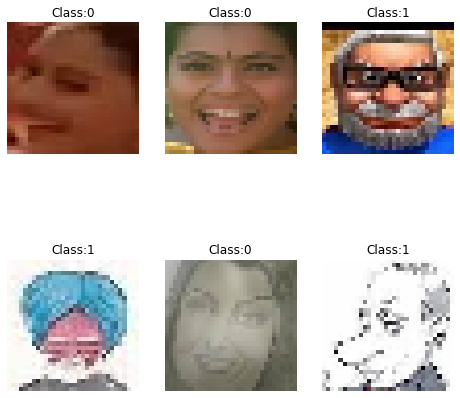

In [45]:

N,H,W = X.shape[0:3]
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

In [46]:
X = X.reshape((N,H*W*C))

cov = np.cov(X.T)
Vals,Vecs = linalg.eig(cov)
Thresh = 0.02
Vals_Yale = Vals[np.where(Vals > Thresh)]
NumComponent= len(Vals_Yale)
print(NumComponent)

536


In [47]:
#Features
pca,X_3D = get_pca(X,NumComponent)
kpca,X_kpca= get_kernel_pca(X,NumComponent)
lda,X_lda = get_lda(X,y,NumComponent)
klda,X_klda = get_kernel_lda(X,y,NumComponent)

In [48]:
# Create your classifier
X_train,X_test,y_train,y_test = train_test_split(X_klda,new_y,test_size = 0.2,random_state=76)

clf = MLPClassifier(hidden_layer_sizes = (10),batch_size=8,learning_rate='adaptive',verbose=False,max_iter=1000)


    

In [49]:
Y_train = []
Y_test = []
for i in range(len(y_train)):
    temp = y_train[i].split(" ")[0]
    Y_train.append(int(temp))
for i in range(len(y_test)):
    temp = y_test[i].split(" ")[0]
    Y_test.append(int(temp))

clf.fit(X_train,Y_train)

# Validate your classifier
# predictions = clf.predict(X_test)
# count = np.count_nonzero(predictions==y_test)
# print("Accuracy: {0:.4f}%".format(100*count/y_test.shape[0]))

predictions = clf.predict(X_test)
accuracy = accuracy_score(Y_test,predictions)

0.9953488372093023
k-fold validation accuracy, k = 5
99.3467%


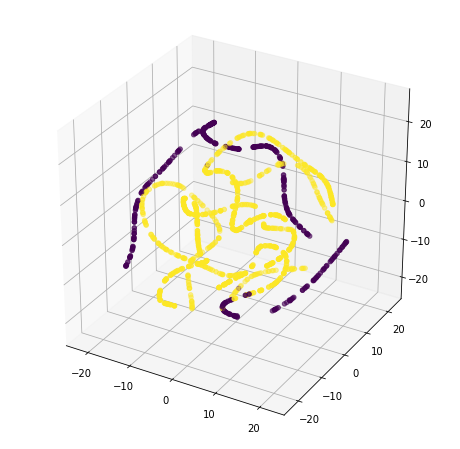

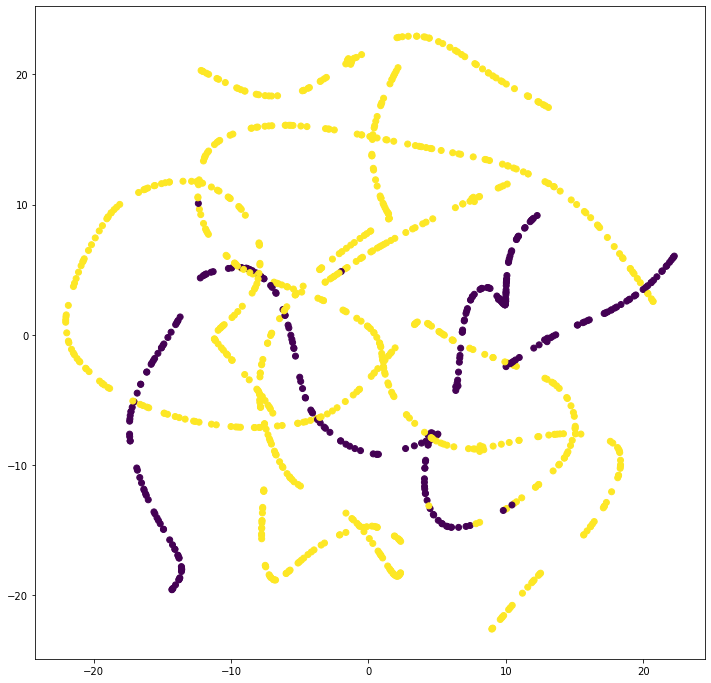

In [50]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc.
print(accuracy)

    
print("k-fold validation accuracy, k = 5")
print("{0:.4f}%".format(np.mean(cross_val_score(clf,X_klda,y,cv=5))*100))

X_TSNE = TSNE(n_components=3,perplexity=8,learning_rate=70,n_iter=1000,random_state=100).fit_transform(X_klda)

Plot3D(X_TSNE,y)
Plot2D(X_TSNE,y)    
#ISOMAP


Text(0.5, 1.0, 'IsoMap')

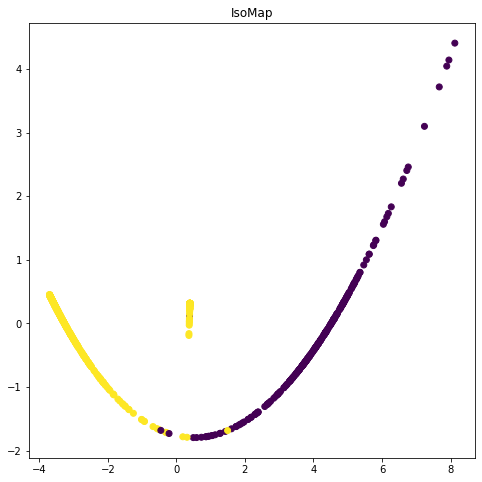

In [51]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc. 
from sklearn.manifold import Isomap
embedding = Isomap(n_neighbors=7,n_components=3,max_iter=1000)
isomap = embedding.fit_transform(X_klda)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.scatter(isomap[:,0],isomap[:,1],c=y)
plt.title('IsoMap')

In [52]:
# Show quantitative results such as examples of correct prediction and wrong prediction
wrong_pred = []
correct_pred = []

for i in range(len(Y_test)):
    if Y_test[i]!=predictions[i]:
        wrong_pred.append(i)
        
for i in range(len(Y_test)):
    if Y_test[i]==predictions[i]:
        correct_pred.append(i)

Incorrect Prediction


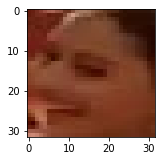

Correct Prediction


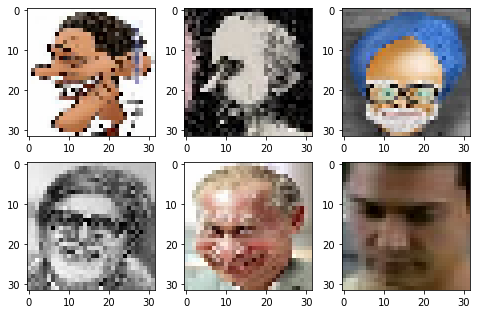

In [53]:
fig = plt.figure(figsize=(8,8))
print("Incorrect Prediction")

temp = 1
for i in wrong_pred:
    if(temp > 6):
        break
    a = y_test[i].split(" ")
    a = a[1].split("\'")
    fig.add_subplot(3,3,temp)
    plt.imshow(load_image(a[0]))
    temp += 1
plt.show()

print('Correct Prediction')

fig2 = plt.figure(figsize=(8,8))
temp = 1
for i in correct_pred:
    if(temp > 6):
        break
    a = y_test[i].split(" ")
    a = a[1].split("\'")
    fig2.add_subplot(3,3,temp)
    plt.imshow(load_image(a[0]))
    temp += 1
plt.show()

